# Project: Medical_appointments-may-2016

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

We'll be analyzing a collected inforamtion of 100k medical appointments in Brazil and focusing on the question of whether or not patients show up for their appointment and what is the relation between them showing up and other data provided.                                                       
The columns included in this data table are:
> 1- PatientId: set a special Id for each patient to have the history of each patient related if later needed.
> 2- AppointmentID: unique number for each appointment booked.                                
> 3- Gender:males(m), females(F).                         
> 4- Scheduled Day: the date assigned for the appoinment.               
> 5- Appointment Day: the date the patient showed up in.                     
> 6- Age: the age of the patient.                                                              
> 7- Neighbourhood: indicates the location of the hospital.                     
> 8- Scholarship: whether or not the patient is enrolled in  Brasilian welfare program.                    
> 9- Hipertension: whether the patient has hypertention(1) or not(0).                       
> 10- Diabetes: whether the patient has Diabetes(1) or not(0).                     
> 11- Alcoholism: whether the patient is alcoholic(1) or not(0).                      
> 12- Handcap: whether the patient is handicapped(1) or not(0).                       
> 13- SMS_received: the patient recieving a message regarding the appoinment(1) or not(0).                   
> 14- No-show: whether the patient showed(No) or didn't show(Yes).

### Question(s) for Analysis
Q1: Does having a scholarship affects showing in appointment?                          
Q2: How age is associated with showing in appointment?                            
Q3: Does recieving SMS decrease showing in appointment?                       

In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [400]:
# Upgrade pandas to use dataframe.explode() function. 
%pip install --upgrade pandas==0.25.0

Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [907 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\pandas
      copying pandas\conftest.py -> build\lib.win-amd64-cpython-310\pandas
      copying pandas\testing.py -> build\lib.win-amd64-cpython-310\pandas
      copying pandas\_typing.py -> build\lib.win-amd64-cpython-310\pandas
      copying pandas\_version.py -> build\lib.win-amd64-cpython-310\pandas
      copying pandas\__init__.py -> build\lib.win-amd64-cpython-310\pandas
      creating build\lib.win-amd64-cpython-310\pandas\api
      copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-310\pandas\api
      creating build\lib.win-amd64-cpython-310\pandas\arrays
      copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-310\pandas\arrays
 

  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.2
    Uninstalling pandas-1.5.2:
      Successfully uninstalled pandas-1.5.2
  Running setup.py install for pandas: started
  Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\aymls\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages\pandas-1.5.2.dist-info\
   from C:\Users\aymls\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\~andas-1.5.2.dist-info
  Moving to c:\users\aymls\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-pack

<a id='wrangling'></a>
## Data Wrangling


In [401]:
noshow = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [402]:
noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [403]:
noshow.shape

(110527, 14)

In [404]:
noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [405]:
noshow.duplicated().sum() #checking duplicates

0

In [406]:
noshow.info() #checking dtypes, NAN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

### Correcting data types
> first: changing type of patient id from a float to an integer

In [407]:
noshow["PatientId"] = noshow["PatientId"].astype(int)
noshow.info() #check the changes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int32 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int32(1), int64(8), object(5)
memory usage: 11.4+ MB


C:\Users\aymls\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


> changing ScheduledDay , AppointmentDay from an object to a datetime

In [408]:
r = ['ScheduledDay', 'AppointmentDay']
for i in r :
    noshow[i] = pd.to_datetime(noshow[i])        
noshow.info() #check the changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int32              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

# Changing Columns names

In [409]:
# replace spaces with underscores and lowercase labels for the dataset
noshow.rename(columns = lambda x: x.strip().lower().replace('-','_'), inplace = True)
noshow.head()  #check the columns names changes

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,-2147483648,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,-2147483648,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,-2147483648,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,-2147483648,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [410]:
#changing names to be compatible with other columns 
old_names = ["patientid", "appointmentid", "appointmentday", "scheduledday"]
new_names = ["patient_id", "appointment_id", "appointment_day", "scheduled_day"]
for i in range(4) :
    noshow.rename(columns = {old_names[i]:new_names[i]},inplace = True)
noshow.head() #checking result

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,-2147483648,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,-2147483648,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,-2147483648,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,-2147483648,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Dropping illogical data

In [411]:
noshow.query("age < 0") #Selecting ages less than 0
noshow.drop(99832, axis = 0, inplace = True) #Dropping these data
r = noshow.query("handcap > 1").index.tolist() #Selecting values more than 1
noshow.drop(r, axis = 0, inplace = True) #Dropping these values

# turning no_show column to 0 for no , 1 for yes

In [412]:
noshow['no_show'] = noshow['no_show'].apply(lambda x: 0 if x=='No' else 1)
noshow.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,-2147483648,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,-2147483648,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,-2147483648,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,-2147483648,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis


> scatter plot showing relations between columns of the dataset

C:\Users\aymls\AppData\Local\Temp\ipykernel_780\2722896304.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(noshow.corr(), annot = True, fmt = '.2f',


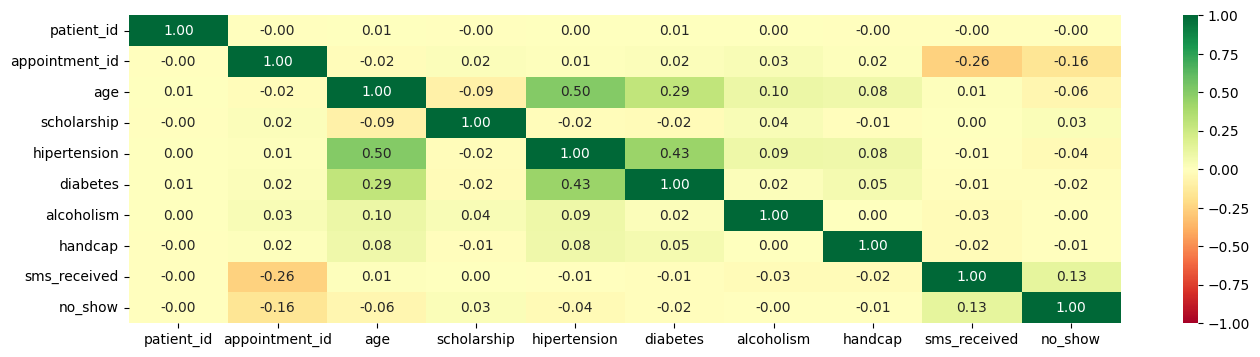

In [413]:
#set plot dimension
plt.figure(figsize = [16,4])

sns.heatmap(noshow.corr(), annot = True, fmt = '.2f',
cmap = 'RdYlGn',
vmin = -1, center = 0, vmax= 1);


# How scholarships affects showing in appointments?

COMPARING SAMPLES OF SCHOLARSHIPS WITH SHOWING IN APPOINTMENTS

In [414]:
noshow.groupby('scholarship')['no_show'].value_counts().unstack('no_show')

no_show,0,1
scholarship,,
0,79783,19701
1,8266,2577


It shows that counts of people who received scholarships are almost 1/10 of the one who didn't so the sample isn't compatible

Visualization of scholarships and Appointments showing percentages

In [415]:
# defining plot percentage function
def mypercentplot(df,xvar, normalize = True, color = ['red', 'blue']):
    ''' function to plot bar visualization of different values against no_show column
    Inputs: df dataset
    xvar column name
    normalize percentage transformation defaulted true
    colors red, blue defaults
    output: barplotted with percentage of chosen values against no_show  '''
    
    #If count plot multiply by 1, otherwise multiply be 100
    mul = 1
    if normalize:
        mul = 100
    #plot
    df.groupby([xvar])['no_show'].value_counts(normalize = normalize).unstack('no_show').mul(mul).plot.bar(edgecolor = "black", figsize = [14,6], rot = 0, width = .8, color = color);
    
    #Clean_up after plotting
    xvar = xvar.replace('_', " ") #replace _ with space
    
    #add_title and format it
    plt.title(f'percentage show/no by {xvar}'.title(), fontsize = 14, weight = 'bold')
    #add_xlabel and format it
    plt.xlabel(xvar.title(), fontsize = 10, weight = 'bold')
    #add_ylabel and format it
    plt.ylabel('percentage'.title(), fontsize = 10, weight = 'bold')

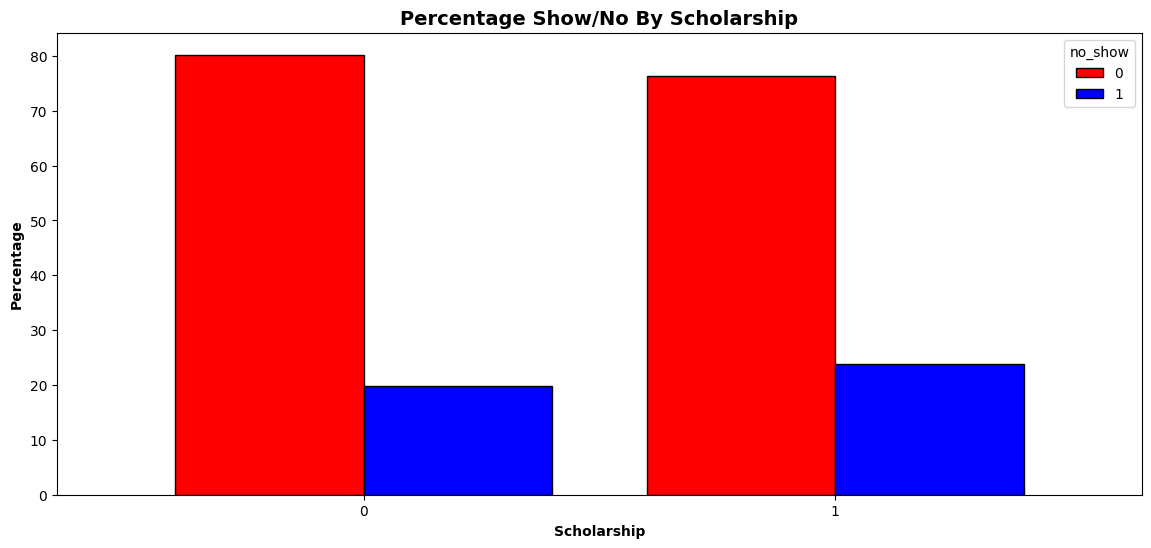

In [416]:
#call plotting function
mypercentplot(noshow, 'scholarship')

   people that missed their appointments and didn't have scholarship are the least among all

# Q2:  How age is associated with showing in appointment?

> Fig (1): A histogram showing relation between age and no_show columns

<AxesSubplot: xlabel='age'>

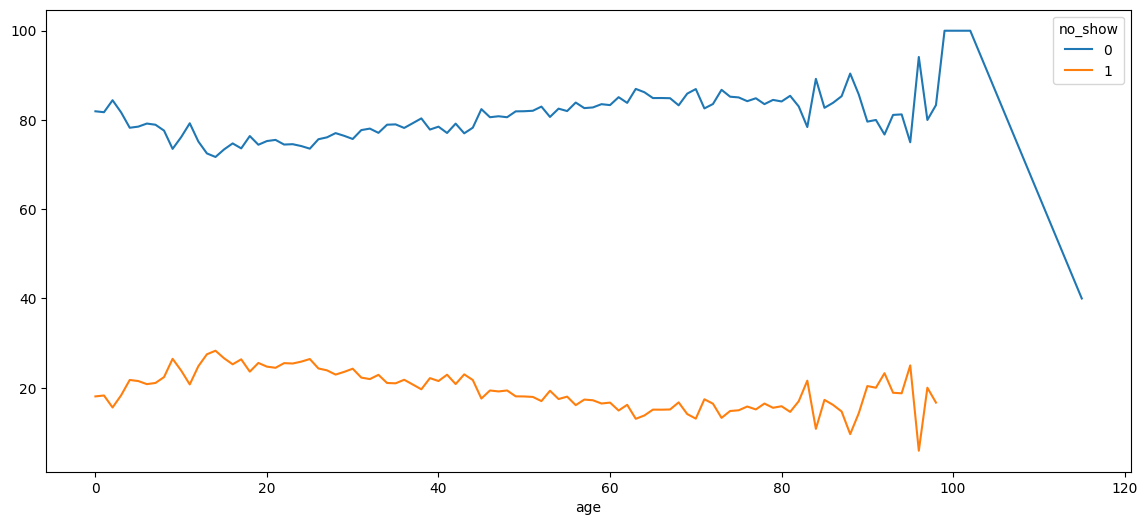

In [417]:
noshow.groupby('age')['no_show'].value_counts(normalize= True).unstack('no_show').mul(100).plot(figsize = [14,6])

 ages between 45 and 115 are showing the least numbers in missing their appointments which needs more investigations

> specifying age ranges in dataset

In [418]:
noshow["age"].describe()

count    110327.000000
mean         37.070753
std          23.098052
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

> dividing ages into different stages

In [419]:
#Intervals for age and lables
Age_Intervals = [0,18,45, noshow["age"].max()]
Age_labels = ['childs', 'youngs', 'elders']
#Create a new Age_groups variables 
noshow['age_groups'] = pd.cut(noshow['age'], Age_Intervals, labels = Age_labels, include_lowest = True)

noshow['age_groups'].value_counts() #COMPARING THE SAMPLES

elders    42843
youngs    38665
childs    28819
Name: age_groups, dtype: int64

> statistics in different stages

In [420]:
noshow.groupby('age_groups')['no_show'].value_counts(normalize= True).unstack('no_show').reindex(Age_labels).mul(100)

no_show,0,1
age_groups,,
childs,78.000625,21.999375
youngs,77.170568,22.829432
elders,83.402189,16.597811


>visualization of numbers of both attendants and absents of the same sample_numbers versus ages

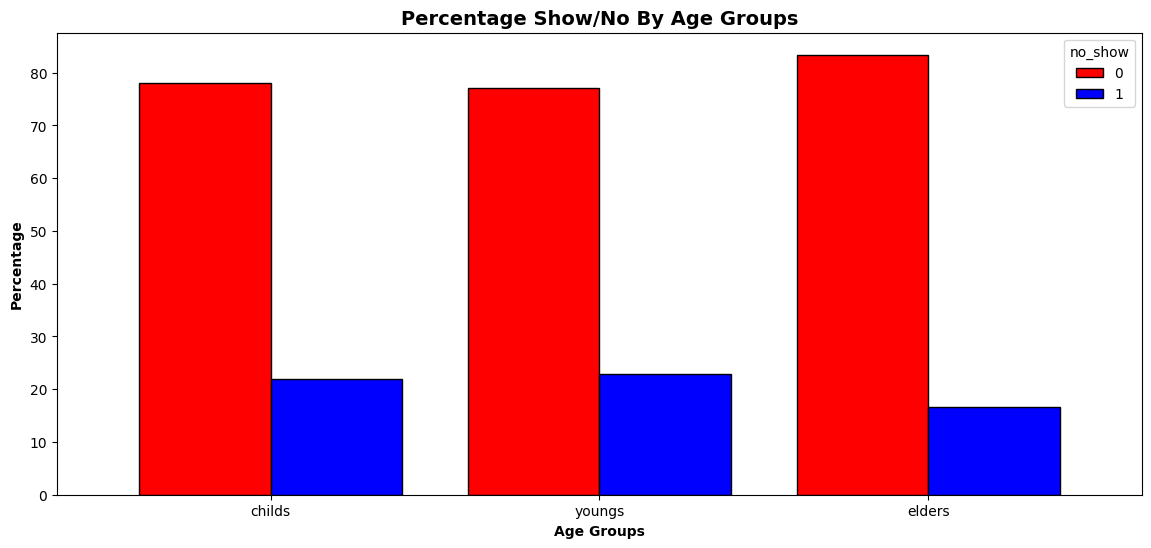

In [421]:
#call plotting function
mypercentplot(noshow, 'age_groups')

percentages of elders group are most committed to their appointments

# Q3: Does recieving SMS decrease showing in appointment?


>Inspecting SMS relation with showing

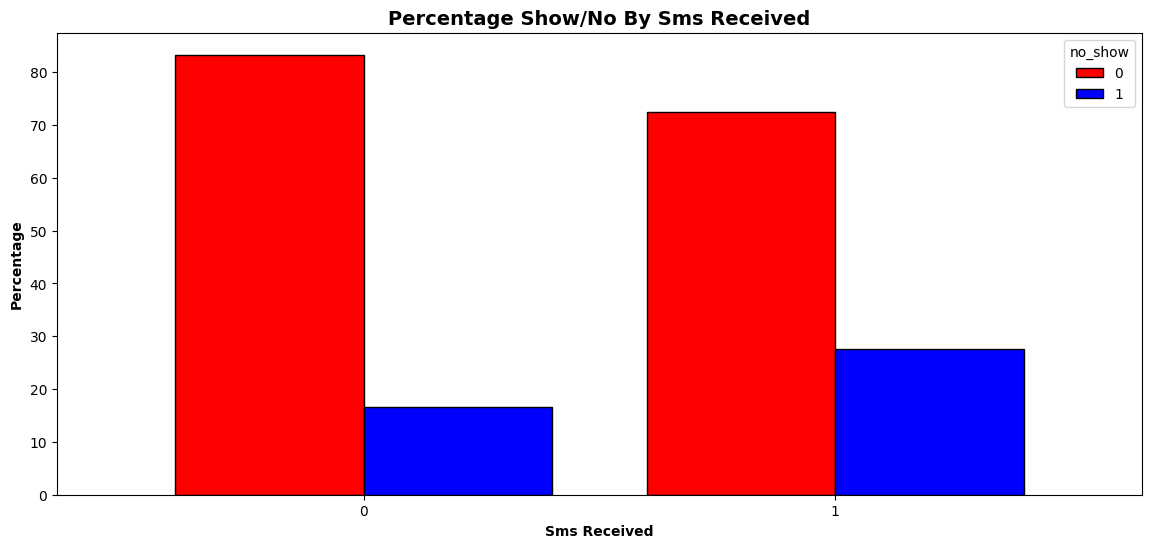

In [422]:
mypercentplot(noshow,'sms_received')

people that received sms are missing appointments more frequently

COMPARING SAMPLES OF SMS_RECEIVED WITH SHOWING IN APPOINTMENTS

In [423]:
noshow.groupby('sms_received')['no_show'].value_counts().unstack('no_show')

no_show,0,1
sms_received,,
0,62389,12503
1,25660,9775


It shows that counts of people who received sms are almost half of the one who didn't so the sample isn't compatible

<a id='conclusions'></a>
## Conclusions


I stated the analysis with showing some statistics about the data set and determined the data needs to be fixed.
In the cleaning stage I first changed the data types of columns then changed names of columns to be compatible with each other for easy remembering.
Then I dropped illogical data like negative ages and also turned the yes and no in no_show column into zeros and ones.      

> 1- In the first question I compared those with scholarships attending and missing their appointments to people without scholarships to see if having scholarship affected showing in appointments.                                  
  
It showed that people with no_scholarships showed in their appointments more than those with scholarships and also got a less numbers in missing their appointments.             
                                                      
limitation : The analysis could give better results if information about the payment timing process and the cost of appointments that were missed are provided and analyzed the aspect of prepaid appointments.
Also the samples weren't compatible so more data should be provided for more accurate results.

> 2- The second question was exploring the ages that are more willing to commit to the schedule. It showed that people that are classified as elders are the least people missing their appointments.                                                       
              
limitation: The groups were different in numbers of people, people with higher ages sample was the minimum, though the analysis was done with a ratio it will reduce the margin error to unit the samples of each stage and also analyze the medical status in these groups as it may affect the relation expected between age and showing in appointments.


> 3- The third question was seeing if sending an SMS could reduce missing the appointments. It showed that people who didn't receive SMS were less absent than those who didn't. 


Limitations: Sending messages more often could give different results as the number of sms sent were almost one third of the total sample, so more data should be provided for more accurate results.

In [424]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1